In [240]:
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import nltk

# LOAD DATA

In [241]:
# Create dataset: join the info from the 2 channels, change the channel names to 0 and 1.

def create_dataset(dataframe1, dataframe2):
    # Load both pandas: 
    
    df1 = pd.read_csv(dataframe1)
    df2 = pd.read_csv(dataframe2)

    # Join the two pandas
    final_df = pd.concat([df1, df2], join="inner")

    # Change the channel name to 0 or 1 (binary classifier):
    final_df["channel"] = np.where(final_df["channel"] == "#pgl", 0, 1)
    
    # Drop these 2 columns since they don't provice much information for our problem:

    final_df.drop("datetime", axis=1, inplace=True)
    final_df.drop("Unnamed: 0", axis=1, inplace=True)
    
    return final_df

In [242]:
final_df = create_dataset(r"data\dataset1.csv", r"data\df1.csv")
print(final_df.shape)

(6000, 3)


In [243]:
final_df

,username,channel,message
0,talal_wolf,0,Pog
1,dustydusky,0,useless
2,luene3,0,OMG REDEMPTION ARC
3,ryujinayato,0,VAC
4,partyboycs,0,FROM BOT TO GOD
...,...,...,...
2995,saikolezi,1,Pog
2996,groody,1,ahhahaha
2997,angel_creal,1,POG
2998,henryhal2,1,Clutch


# LOWERCASE

In [244]:
# Notice that we want Sleep = SLEEP = SlEEp = sleeP ETC
final_df["message"] = final_df["message"].str.lower()

# REMOVE RAW IF ANY NAN IN IT

In [245]:
final_df  = final_df.dropna()
print(final_df.shape)

(5999, 3)


# REMOVE STOPWORDS AND PUNCTUATION SYMBOLS

In [246]:
# Import stopwords with scikit-learn
# Remove words like: can, could, will, been, would...
import string
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
stop_words = list(stop) + list(string.punctuation)

def clean_text ( text ) :
    words_List = nltk.word_tokenize(text)
    final_list = [ elto for elto in words_List if elto not in stop_words ]
    return (" ". join ( final_list ))

In [247]:
final_df["message"] = final_df["message"].apply( clean_text )

C:\Users\Nikos\AppData\Local\Temp\ipykernel_17824\4043655963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["message"] = final_df["message"].apply( clean_text )


In [248]:
final_df

,username,channel,message
0,talal_wolf,0,pog
1,dustydusky,0,useless
2,luene3,0,omg redemption arc
3,ryujinayato,0,vac
4,partyboycs,0,bot god
...,...,...,...
2995,saikolezi,1,pog
2996,groody,1,ahhahaha
2997,angel_creal,1,pog
2998,henryhal2,1,clutch


# STEMMING

In [249]:
# Stemming is the process of reducing inflection in words (e.g. connection, connects, connected) to their root form (e.g. connect). 
# Use English stemmer.
stemmer = SnowballStemmer("english")

final_df['message'] = final_df['message'].astype(str).str.split()
final_df['message'] = final_df['message'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

print(final_df.shape)


C:\Users\Nikos\AppData\Local\Temp\ipykernel_17824\2840957778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['message'] = final_df['message'].astype(str).str.split()


(5999, 3)


C:\Users\Nikos\AppData\Local\Temp\ipykernel_17824\2840957778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['message'] = final_df['message'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.


In [250]:
# final_df.drop(subset='message', )

,username,channel,message
0,talal_wolf,0,[pog]
1,dustydusky,0,[useless]
2,luene3,0,"[omg, redempt, arc]"
3,ryujinayato,0,[vac]
4,partyboycs,0,"[bot, god]"
...,...,...,...
2995,saikolezi,1,[pog]
2996,groody,1,[ahhahaha]
2997,angel_creal,1,[pog]
2998,henryhal2,1,[clutch]


# DROP THE ROWS THAT DON'T HAVE ANY MESSAGE! 

In [251]:
indexes_to_remove = []
for i, element in enumerate(final_df["message"]):
    if len(element) == 0:
        indexes_to_remove.append(i)
        
# We want to drop the rows that are in this index!  
print(indexes_to_remove)

[6, 216, 398, 552, 822, 892, 1089, 1195, 1217, 1355, 1575, 1648, 1687, 1690, 1774, 2146, 2800, 2812, 2814, 2860, 2863, 2867, 2871, 2888, 2955, 3148, 3171, 3202, 3264, 3318, 3339, 3401, 3544, 3667, 3758, 3867, 4096, 4104, 4113, 4114, 4137, 4147, 4184, 4369, 4727, 4729, 4746, 4752, 4754, 4764, 4778, 4920, 4962, 4963, 4978, 4989, 5002, 5008, 5083, 5088, 5089, 5090, 5094, 5100, 5106, 5107, 5113, 5125, 5126, 5130, 5131, 5136, 5138, 5144, 5209, 5312, 5316, 5404, 5414, 5419, 5422, 5426, 5433, 5443, 5466, 5484, 5506, 5517, 5522, 5523, 5534, 5535, 5543, 5548, 5556, 5591, 5596, 5600, 5608, 5645, 5655, 5719, 5741, 5752, 5757, 5771, 5772, 5800, 5821, 5830, 5851, 5887, 5900]


In [252]:
final_df = final_df.drop(final_df.index[indexes_to_remove])

In [253]:
final_df.shape

(5775, 3)

# SHOW A WORD CLOUD FOR EACH CHANNEL (MOST COMMON WORDS)

In [254]:
from wordcloud import WordCloud 


# Select the messages for each class
df1_clean = final_df[final_df["channel"] == 0]
df2_clean = final_df[final_df["channel"] == 1]

# Create string of the messages to insert it into the wordcloud
df1_messages_to_string = []
for element in df1_clean["message"]:
    for i in element:
        df1_messages_to_string.append(i)
        
df2_messages_to_string = []
for element in df2_clean["message"]:
    for i in element:
        df2_messages_to_string.append(i)
        
word_cloud_df1 = WordCloud(collocations = False, background_color = 'white').generate(" ".join(df1_messages_to_string))
word_cloud_df2 = WordCloud(collocations = False, background_color = 'white').generate(" ".join(df2_messages_to_string))

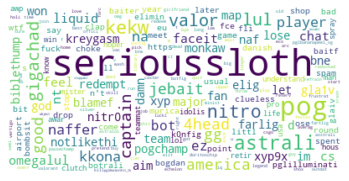

In [255]:
# Display the generated image:
plt.imshow(word_cloud_df1, interpolation='bilinear')
plt.axis("off")
plt.show()

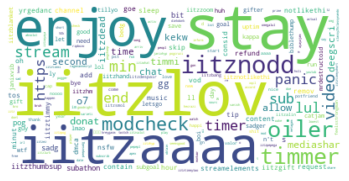

In [256]:
# Display the generated image:
plt.imshow(word_cloud_df2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [257]:
# Transform to string

def list_to_string(text ) :
    text = " ".join(text)
    return text

final_df["message"] = [list_to_string(elto) for elto in final_df["message"]]

In [258]:
final_df

,username,channel,message
0,talal_wolf,0,pog
1,dustydusky,0,useless
2,luene3,0,omg redempt arc
3,ryujinayato,0,vac
4,partyboycs,0,bot god
...,...,...,...
2995,saikolezi,1,pog
2996,groody,1,ahhahaha
2997,angel_creal,1,pog
2998,henryhal2,1,clutch


# DIVIDE DATA: TRAIN & SPLIT

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df["message"], final_df["channel"], test_size=0.2, random_state=42)

# NAIVE BAYES CLASSIFIER

In [260]:
# ### SKLEARN MULTINOMIAL NAIVE BAYES

from sklearn . naive_bayes import MultinomialNB
from sklearn import metrics
import sklearn . feature_extraction . text as txt
from sklearn . pipeline import Pipeline
from sklearn . feature_extraction . text import TfidfVectorizer

In [261]:
# Equivalent to CountVectorizer followed by TfidfTransformer .
tf = TfidfVectorizer()

In [262]:
X_train

1231                                                  lul
2853    oiler modcheck oiler modcheck oiler modcheck o...
395                                            bulli sadg
1517    absolut metagam n't share inform player activ ...
2460                                              oh good
                              ...                        
902                                             iitzsalut
2372                                                timer
2408    timmer iitzaaaa timmer iitzaaaa timmer iitzaaa...
2589                                                   gg
876                                          pog nymncorn
Name: message, Length: 4620, dtype: object

In [263]:
# Return a document - term matrix
vectors = tf.fit_transform(X_train)
vectors_test = tf.transform(X_test)
print (vectors.shape , vectors_test.shape)

(4620, 2595) (1155, 2595)


In [264]:
# train model
clfNB = MultinomialNB ( alpha =0.01)
clfNB.fit(vectors , y_train)

MultinomialNB(alpha=0.01)

In [265]:
# test scores
pred = clfNB.predict(vectors_test)

In [266]:
pred

array([0, 1, 1, ..., 1, 0, 0])

In [267]:
clfNB.score(vectors_test , y_test)

0.8701298701298701

In [268]:
mat = metrics.confusion_matrix (y_test , pred )

In [269]:
mat

array([[496, 102],
       [ 48, 509]], dtype=int64)

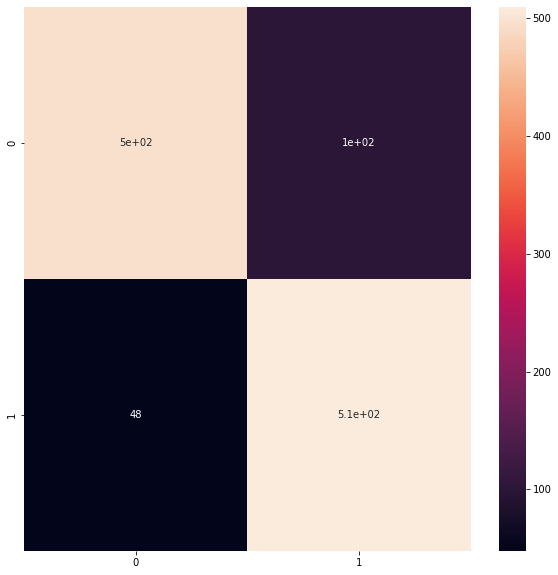

In [270]:
import seaborn as sns

df_cm = pd.DataFrame( mat)
plt.figure(figsize =(10 ,10) )
sns.heatmap(df_cm, annot = True)
plt.show ()

In [271]:
clfNB.score(vectors, y_train)

0.9487012987012987

In [272]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       598
           1       0.83      0.91      0.87       557

    accuracy                           0.87      1155
   macro avg       0.87      0.87      0.87      1155
weighted avg       0.87      0.87      0.87      1155

